# Assignment 5: Topic Models

# sh2432

Due: Tuesday, November 5.

This assignment has three problems. The first is about Bayesian inference. The second two are about topic models. You will first work with abstracts of scientific articles. These abstracts are obtained from arXiv.org, an open access repository for e-prints of articles in scientific fields maintained by Cornell University. You will then work with a collection of movie plots.

*For your convenience, we have separated the problems into three notebooks: assn5_problem1.ipynb, assn5_problem2.ipynb, and assn5_problem3.ipynb. Submit your solutions in these three notebooks, printing out each as a separate pdf.*

We provide significant "starter code" as discussed in lecture. We then ask you build topic models using the Python library gensim, and do some analysis over the topics obtained.

We ask that you please at least start the assignment right away. If you have any difficulties running gensim we would like to know!

## Problem 1: Bayes

Consider the scenario of rolling a 4-sided die with the numbers $1$, $2$, $3$, and $4$ on its faces. Suppose we roll this die many times and get a collection of $n$ outcomes represented by $X_{1}, X_{2}, ..., X_{n}$. Here each $X_{i}$ is a random variable that independently follows a Multinomial$(p_{1}, p_{2}, p_{3}, p_{4})$ model (where $p_{1}+p_{2}+p_{3}+p_{4}=1$).

This die may or may not be fair. If it were fair then $p_{1}=p_{2}=p_{3}=p_{4}=0.25$, but since we are uncertain about these parameters we treat them as random and the problem requires Bayesian inference.

In [25]:
import numpy as np
import matplotlib.pyplot as plt
import pickle
import pandas as pd

### Part (a)

For all of Problem 1 we will assume that $(p_{1}, p_{2}, p_{3}, p_{4})$ follows a Dirichlet$(\alpha_{1}, \alpha_{2}, \alpha_{3}, \alpha_{4})$ distribution where $\alpha_{1}, \alpha_{2}, \alpha_{3}, \alpha_{4}$ are unknown, positive-valued parameters. Suppose we have a prior belief that the four-sided die is close to being fair. This is represented by $\alpha_{1}= \alpha_{2}= \alpha_{3}= \alpha_{4} = c$ for some positive real number $c$.

For $c = 0.1, 1, 10, 30, 60, 100, 1000$ draw $1000$ samples of $(p_{1}, p_{2}, p_{3}, p_{4})$ from a Dirichlet$(c,c,c,c)$ distribution. For this sample, calculate the mean and standard deviation of $p_{1}$. Create a plot of $log(c)$ vs. the mean and another plot of $log(c)$ vs. the standard deviation. Describe in your own words what happens to these two quantities as $c$ increases.

Text(0, 0.5, 'mean of p1')

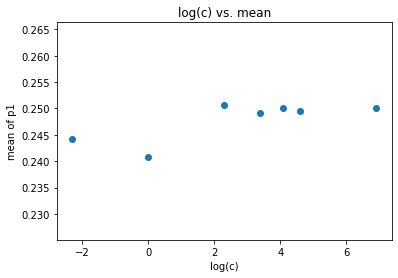

In [26]:
import warnings
warnings.filterwarnings("ignore",category=DeprecationWarning)

np.random.seed(10)
l=[0.1, 1, 10, 30, 60, 100, 1000]
m_list=[]
sd_list=[]
log_list=[]
for a in l:
    c = np.random.dirichlet((a,a,a,a), 1000)
    log=np.log(a)
    m=np.mean(c[:,0])
    sd=np.std(c[:,0])
    log_list.append(log)
    sd_list.append(sd)
    m_list.append(m)

plt.scatter(log_list, m_list)
plt.title("log(c) vs. mean")
plt.xlabel("log(c)")
plt.ylabel("mean of p1")

Text(0, 0.5, 'SD of p1')

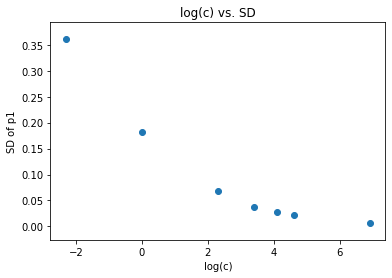

In [27]:
plt.scatter(log_list, sd_list)
plt.title("log(c) vs. SD")
plt.xlabel("log(c)")
plt.ylabel("SD of p1")

In the above plots, we can see that as c increases, the mean of p1 fluctuated and then stablized around 0.25. The standard divation of p1 gets smaller as c increases. 

### Part (b)

The following cell loads 10,000 rolls for the four-sided die. $[1,0,0,0]$ indicates that the die landed on face $1$, $[0,1,0,0]$ indicates that the die landed on face $2$, and so on. For $c = 0.1, 1, 10, 30, 60, 100, 1000$, use Dirichlet$(c,c,c,c)$ as the prior distribution for $(p_{1}, p_{2}, p_{3}, p_{4})$. *Using only the first $100$ rolls of the die*, calculate the mean of the posterior distribution. What do you notice about the posterior mean as $c$ increases?

Give code to compute the answer and plot the results. Also, give a markdown cell with a mathematical expression for the solution.

Hint: The mean of the Dirichlet$(\alpha_{1}, \alpha_{2}, \alpha_{3}, \alpha_{4})$ is $\left( \dfrac{\alpha_{1}}{\alpha_{1} + \alpha_{2} +\alpha_{3} +\alpha_{4}}, \dfrac{\alpha_{2}}{\alpha_{1} + \alpha_{2} +\alpha_{3} +\alpha_{4}}, \dfrac{\alpha_{3}}{\alpha_{1} + \alpha_{2} +\alpha_{3} +\alpha_{4}}, \dfrac{\alpha_{4}}{\alpha_{1} + \alpha_{2} +\alpha_{3} +\alpha_{4}} \right)$

In [28]:
with open("X.pkl", "rb") as f:
    X = pickle.load(f)

In [29]:
x=X[0:100]
p1=np.sum(x[:,0])
p2=np.sum(x[:,1])
p3=np.sum(x[:,2])
p4=np.sum(x[:,3])

In [30]:
from scipy.stats import dirichlet
l=[0.1, 1, 10, 30, 60, 100, 1000]
m_list=[]
a_list=[]
for a in l:
    m = dirichlet.mean((p1+a, p2+a, p3+a, p4+a))
    a_list.append(a)
    m_list.append(m)
mean= np.array(m_list).reshape(7,4)
mean1=np.array(mean[:, 0]).tolist()
mean2=np.array(mean[:, 1]).tolist()
mean3=np.array(mean[:, 2]).tolist()
mean4=np.array(mean[:, 3]).tolist()

Text(0, 0.5, 'mean of the posterior distribution')

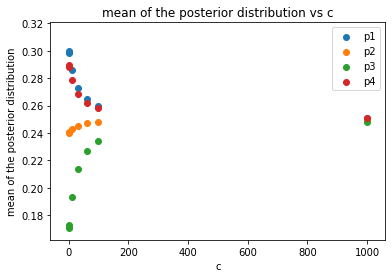

In [31]:
plt.scatter(a_list,mean1, label="p1")
plt.scatter(a_list,mean2, label="p2")
plt.scatter(a_list,mean3, label="p3")
plt.scatter(a_list,mean4, label="p4")
plt.legend()
plt.title("mean of the posterior distribution vs c")
plt.xlabel("c")
plt.ylabel("mean of the posterior distribution")

1. As c increases, the four means of the posterior distribution gradually stablized at 0.25. means of p1 and p4 decrease to 0.25, while means of p2 and p3 increase to 0.25.
2. Based on the Bayesian Inference, since the porior distribution is a Dirichlet distribution (Beta distribution), the posterior distribution is also a Dirichlet distribution in $\theta$ with parameters $x_i+α_i$. Therefore the mean of the posterior distribution is: $E_\pi(\theta|x)\theta_j=\frac{x_j+α_j}{\sum{x_i+α_i}}=\frac{x_j+α_j}{n+\sum{α_i}}$.

### Part (c)

Now repeat the process in Part (b), but with sample sizes $N = 100, 200, 300, ..., 9900, 10000$. For each value of $c$, create a plot that shows the trend of the posterior mean for $p_{1}$ as a function of sample size $N$. Create a similar plot for $p_{2}$, $p_{3}$, and $p_{4}$. Explain what these plots illustrate about the choice of prior and the sample size. What do you estimate were the true parameters used to generate this dataset?

In [32]:
l=[0.1, 1, 10, 30, 60, 100, 1000]
m_list=[]
n_list=list(range(100,10001,100))
for a in l:
    for n in range(100,10001,100):
        x=X[0:n]
        p1=np.sum(x[:,0])
        p2=np.sum(x[:,1])
        p3=np.sum(x[:,2])
        p4=np.sum(x[:,3])
        m = dirichlet.mean((p1+a, p2+a, p3+a, p4+a))
        m_list.append(m)
mean= np.array(m_list).reshape(700,4)

In [33]:
print(p1,p2,p3,p4)

2555 2574 1953 2918


Posterior mean vs sample size N


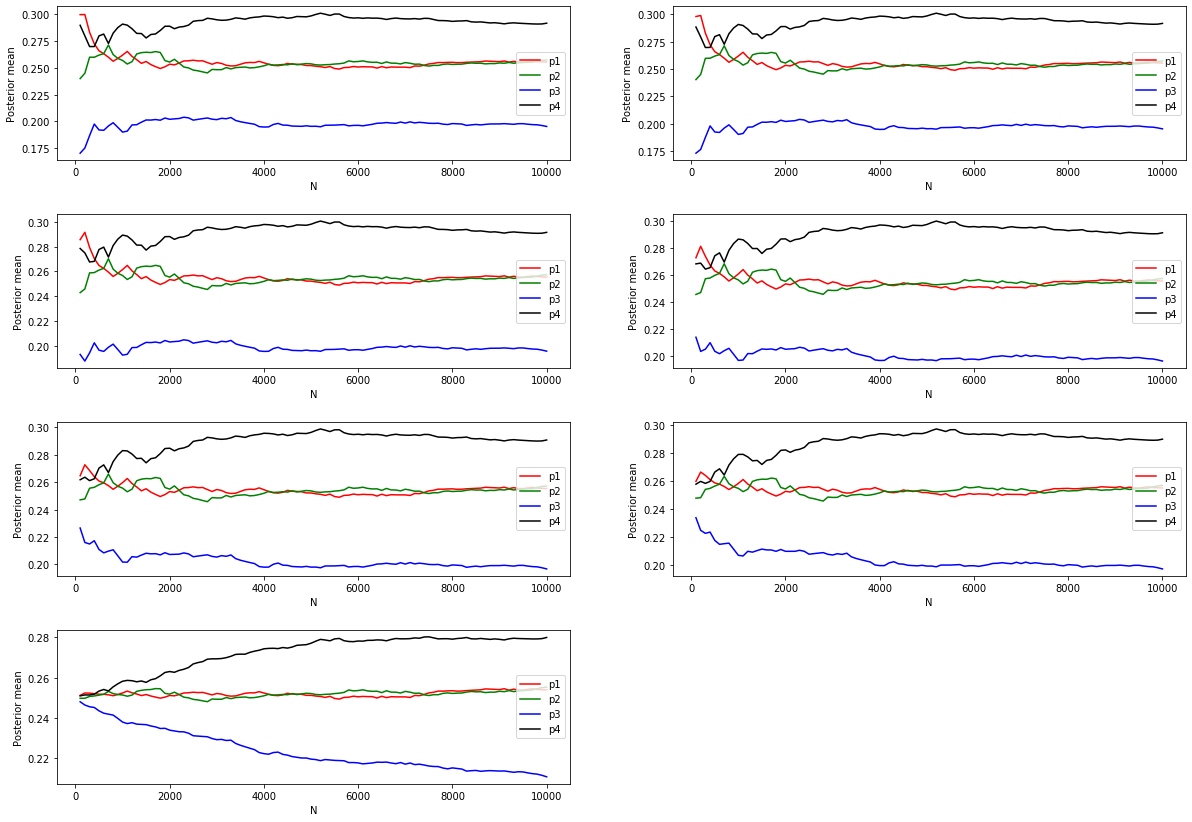

In [34]:
#plot 7 graphs
plt.figure(figsize=(4 * 4, 6 * 2))
plt.subplots_adjust(bottom=0, left=.01, right=.99, top=.90, hspace=.35)
i=0
for n in range(1,8):
    i=i+1
    plt.subplot(4,2,i)
    plt.plot(n_list, np.array(mean[(i-1)*100:100*i, 0]).tolist(),'r',n_list, np.array(mean[(i-1)*100:100*i, 1]).tolist(),'g',
             n_list, np.array(mean[(i-1)*100:100*i, 2]).tolist(),'b',n_list, np.array(mean[(i-1)*100:100*i, 3]).tolist(),'k')
    plt.xlabel('N')
    plt.ylabel('Posterior mean')
    plt.legend(('p1', 'p2', 'p3', 'p4'), loc='center right');
print('Posterior mean vs sample size N')

1. As the sample size N increases, the posterior means of p1 and p2 stablize at 0.25, the posterior mean of p3 gets close to 0.20 and the posterior mean of p4 gets close to 0.30. 
2. As the choice of c increases, when sample size N is small, the four posterior means are closer to the preset posterior mean 0.25.
3. The true parameters $(\alpha_1+c, \alpha_2+c, \alpha_3+c, \alpha_4+c)$ used to generate the dataset should be: (2555+c, 2574+c, 1953+c, 2918+c), where it get closer to the true values when c is greater, when c=1000, the parameters are (3555, 3574, 2953, 3918)
